In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset from the file
file_path = './Patient_Enrolment_Dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows to inspect the data (optional)
print(df.head())

# Preparing the data
X = df.drop('Strict_Diet_Required', axis=1)  # Features
y = df['Strict_Diet_Required']  # Target

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes Classification
model = GaussianNB()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Generating the classification report and accuracy
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Outputting the results
print("Classification Report SHREYA RAJPAL 21BBS0202:\n", report)
print("\nAccuracy: ", accuracy)


   Age  Gender  Weight  Height   BMI  Activity_Level  Cholesterol_Level  \
0   25       1      60     165  22.5               2                200   
1   30       0      70     170  24.2               3                210   
2   35       1      80     175  26.1               4                220   
3   40       0      90     180  27.8               2                230   
4   22       1      65     160  24.0               3                195   

   Strict_Diet_Required  
0                     1  
1                     0  
2                     1  
3                     0  
4                     1  
Classification Report SHREYA RAJPAL 21BBS0202:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


Accuracy:  1.0


    Age  Gender  Weight  Height        BMI  Activity_Level  Cholesterol_Level  \
0    56       1      74     182  34.239822               4                177   
1    46       1      88     189  33.595262               1                277   
2    32       0      82     188  24.607619               5                201   
3    60       0      50     167  18.755034               2                232   
4    25       0     106     189  33.817256               2                260   
..  ...     ...     ...     ...        ...             ...                ...   
95   24       0      69     198  32.615100               5                285   
96   26       1      81     166  30.110355               1                209   
97   41       1      56     193  26.323868               3                177   
98   18       0     101     177  20.114264               4                250   
99   61       1      90     179  26.611662               1                190   

    Cluster  
0    Normal  

C:\Users\Shreya Rajpal\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


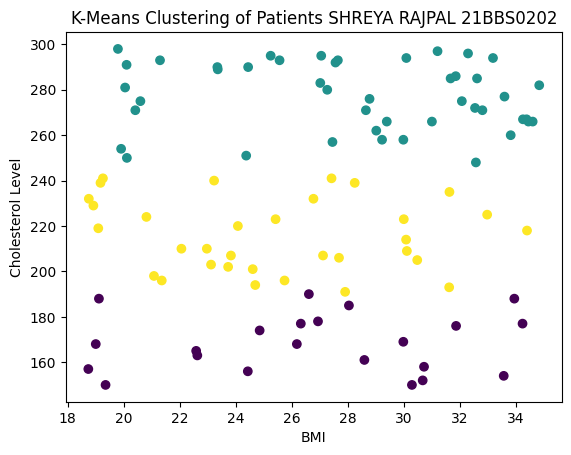

In [23]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = './Patient_Clustering_Dataset.csv'
df = pd.read_csv(file_path)

# Convert Gender back to numerical for clustering (optional)
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

# Select the features for clustering
X = df[['Age', 'Gender', 'Weight', 'Height', 'BMI', 'Activity_Level', 'Cholesterol_Level']]

# Implementing K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Label clusters for better understanding
cluster_labels = {0: 'Normal', 1: 'Healthy', 2: 'Weak'}
df['Cluster'] = df['Cluster'].map(cluster_labels)

# Display the clusters
print(df[['Age', 'Gender', 'Weight', 'Height', 'BMI', 'Activity_Level', 'Cholesterol_Level', 'Cluster']])

# Optional: Plotting the clusters
plt.scatter(df['BMI'], df['Cholesterol_Level'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('BMI')
plt.ylabel('Cholesterol Level')
plt.title('K-Means Clustering of Patients SHREYA RAJPAL 21BBS0202')
plt.show()


Classification Report SHREYA RAJPAL 21BBS0202:
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.83      0.71      0.77         7

    accuracy                           0.70        10
   macro avg       0.67      0.69      0.67        10
weighted avg       0.73      0.70      0.71        10

Accuracy: 0.70


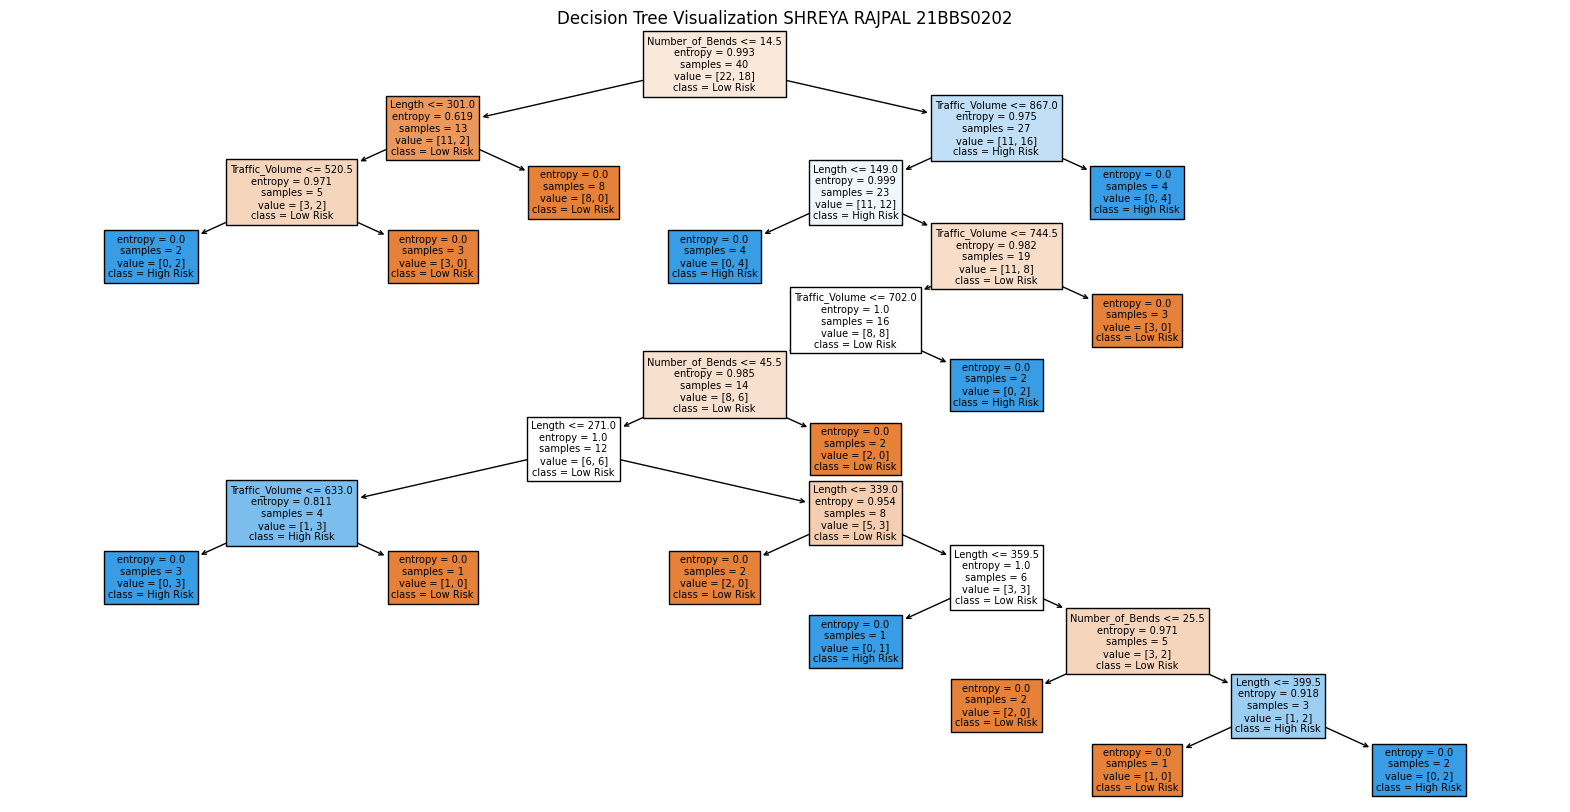

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a synthetic dataset for "Road transport records" with 50 rows
np.random.seed(42)
n_samples = 50

# Road ID: Just a unique identifier for each road
road_id = np.arange(1, n_samples + 1)

# Length: Road length between 100 and 500 km
length = np.random.randint(100, 500, size=n_samples)

# Number of Bends: Number of bends between 1 and 50
number_of_bends = np.random.randint(1, 50, size=n_samples)

# Traffic Volume: Traffic volume between 100 and 1000 vehicles per hour
traffic_volume = np.random.randint(100, 1000, size=n_samples)

# Accident Risk: Binary classification for accident risk (1 = High, 0 = Low)
accident_risk = np.random.choice([0, 1], size=n_samples)

# Create the DataFrame
road_data = pd.DataFrame({
    'Road_ID': road_id,
    'Length': length,
    'Number_of_Bends': number_of_bends,
    'Traffic_Volume': traffic_volume,
    'Accident_Risk': accident_risk
})
road_data.to_csv("Road_dataset.csv")
# Step 2: Load the dataset and implement the ID3 (Decision Tree) algorithm
# Prepare the data
X = road_data.drop(['Road_ID', 'Accident_Risk'], axis=1)  # Features (excluding Road_ID)
y = road_data['Accident_Risk']  # Target (Accident Risk)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Implement Decision Tree Classifier (ID3)
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
decision_tree.fit(X_train, y_train)

# Step 4: Make predictions and evaluate accuracy
y_pred = decision_tree.predict(X_test)

# Generate the classification report and accuracy score
classification_rep = classification_report(y_test, y_pred)
accuracy_val = accuracy_score(y_test, y_pred)

# Display classification metrics in a structured way
print(f"Classification Report SHREYA RAJPAL 21BBS0202:\n{classification_rep}")
print(f"Accuracy: {accuracy_val:.2f}")

# Step 5: Display the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree, filled=True, feature_names=['Length', 'Number_of_Bends', 'Traffic_Volume'], class_names=['Low Risk', 'High Risk'])
plt.title("Decision Tree Visualization SHREYA RAJPAL 21BBS0202")
plt.show()
